<a href="https://colab.research.google.com/github/evan-placenis/Time_Series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Getting Bitcoin price data

Going to be using the historical price data of bitcoing to try and predict the future price of bitcoin


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-05-25 15:33:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.008s  

2023-05-25 15:33:20 (21.0 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
#importing data with pandas
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
#Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Prices"})
bitcoin_prices.head()

,Prices
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0, 0.5, 'BTC Price')

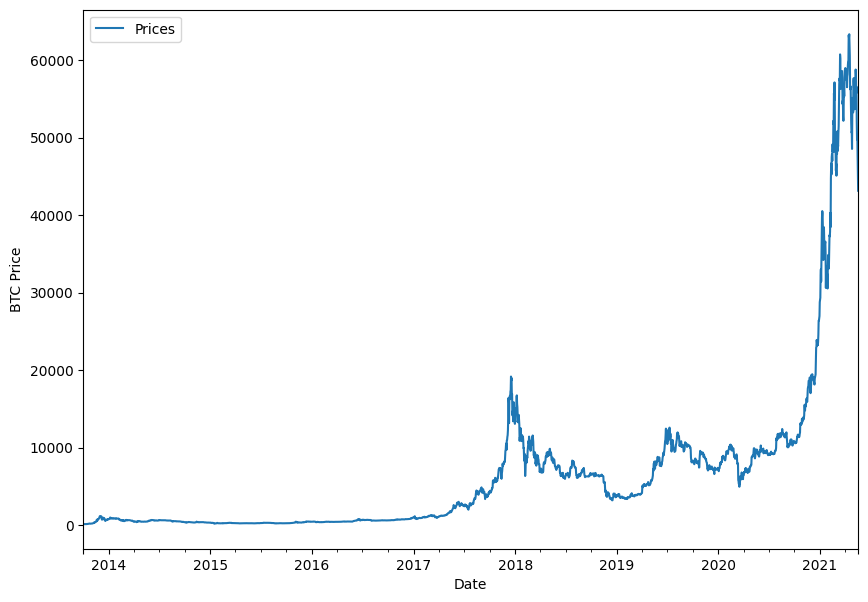

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")


Importing data with Python's CSV module

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #skip header line
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0, 0.5, 'BTC Price')

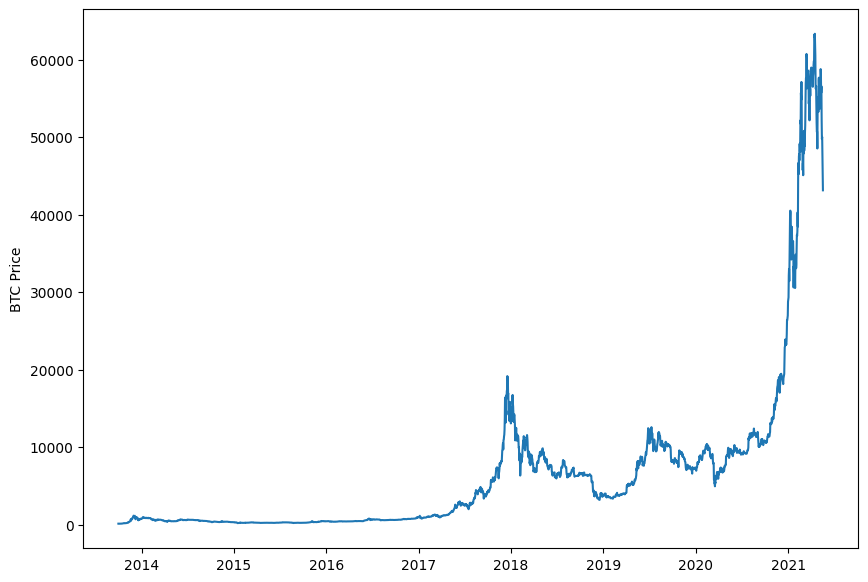

In [ ]:
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")

Create Train and Test tests for data

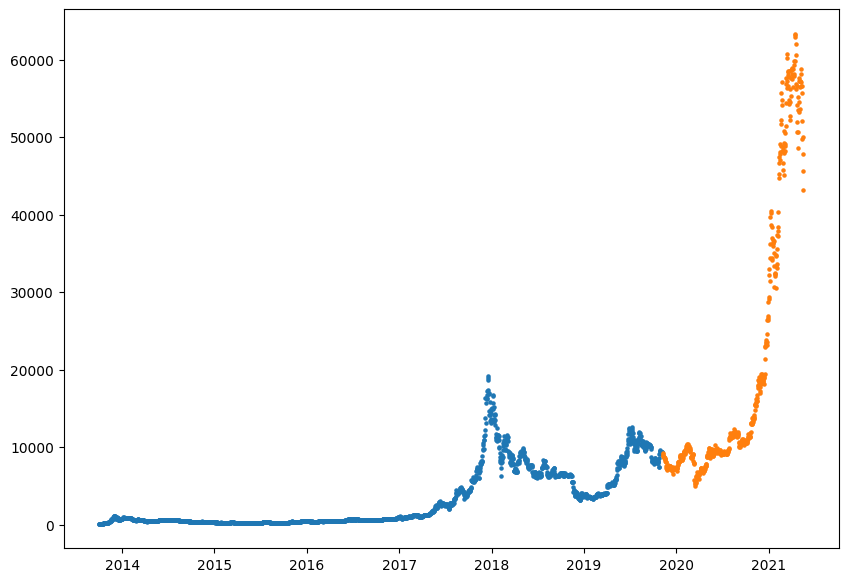

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Prices"].to_numpy()
split_size = int(0.8* len(prices)) #80% train, 20% test

#Create train data splits (everything before the split)
x_train, y_train = timesteps[:split_size], prices[:split_size]

x_test, y_test = timesteps[split_size:], prices[split_size:]

plt.figure(figsize = (10,7))
plt.scatter(x_train, y_train, s =5, label = "train data")
plt.scatter(x_test, y_test, s = 5, label = "test data")
plt.show()

In [ ]:
# Create a plotting function
def plot_time_series(timesteps, values, format = ".", start = 0, end = None, label = None):
  """
  Paramaters
  ------------------
  timesteps: array of timestep values
  values: array of values across time
  format: style of plot, default "."
  start: where to start the plot (index on timesteps)
  end: where to end the plot (index on timesteps)
  label: label to show on plot about values
  """

  plt.plot(timesteps[start:end], values [start:end], format, label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14)

  plt.grid(True)

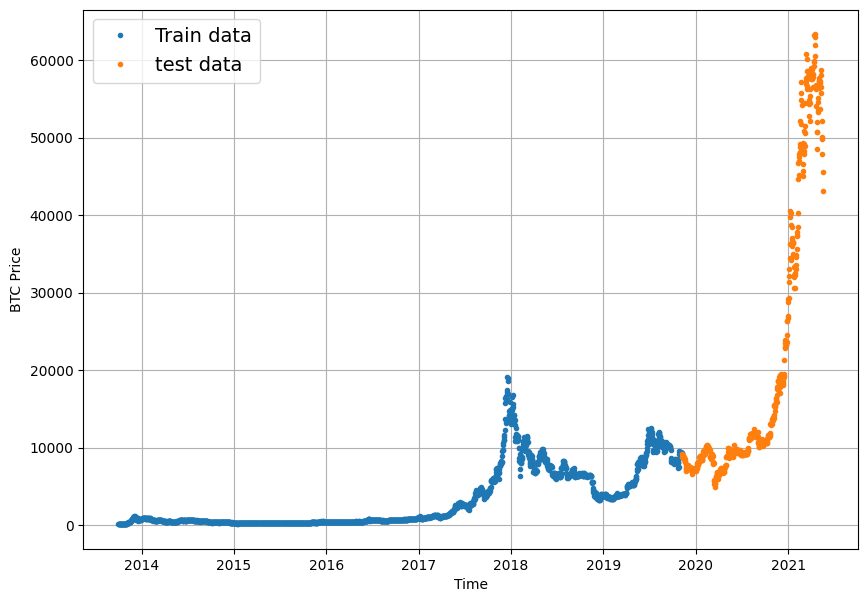

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(x_train,y_train,label = "Train data")
plot_time_series(x_test,y_test,label = "test data")

##Model 0: Naive forecase - Baseline

Formula:
$$\hat{y}_{t} = y_{1-1}$$

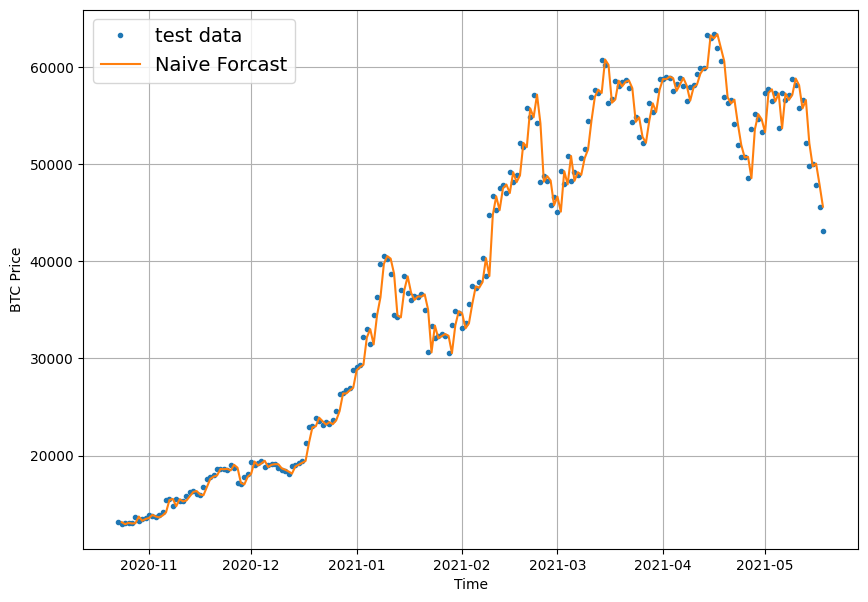

In [ ]:
naive_forcast = y_test[:-1]
#Forcasting: Principles in Practive ---- READ THIS
#Plot naive forcast
plt.figure(figsize=(10,7))
#plot_time_series(x_train,y_train,label = "Train data")
plot_time_series(x_test,y_test,start = 350,label = "test data")
plot_time_series(x_test[1:], naive_forcast,start = 350, format = "-", label = "Naive Forcast")

In [ ]:
#Evaluating a Time Series Model
import tensorflow as tf
#MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  MASE assuming no seasonality of data
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  #Find MAE of naive forcast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))  #out seasonality is 1 day (shift of 1)

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_test[1:], naive_forcast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
  #make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred= tf.cast(y_pred, dtype = tf.float32)

  #calculate evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  return{"mae":mae.numpy(),
         "mse":mse.numpy(),
         "rmse":rmse.numpy(),
         "mape":mape.numpy(),
         "mase":mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_test[1:],
                                naive_forcast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

#Windowing our dataset to turn our data into a supervised learning problem

In [ ]:

print(f"Want to use : {btc_price[:7]} tp predict this: {btc_price[7]}")

Want to use : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] tp predict this: 123.033


In [ ]:
HORIZON = 1 #predict next 1 day
WINDOW_SIZE = 7   #use the past week of data to make prediction

def get_labelled_window(x, horizon = HORIZON):
  """
  Created labels for windowed dataset

  E.g: if horizon = 1
  Input  [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6],[7])
  """
  return x[:, :-horizon], x[:,-horizon:]

In [ ]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis = 0), horizon = HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


Create new function to do this across the entire dataset

In [ ]:
import numpy as np
def make_windows(x, window_size= WINDOW_SIZE, horizon = HORIZON): #tf.keras.preprocessing has a similar function (timeseries_dataset_from_array)
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  #window specific window_size
  window_step = np.expand_dims(np.arange(window_size+horizon), axis = 0)

  #2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon-1)), axis = 0).T #creat 2d array of window

  #index on the target arra (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  #Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon = horizon)
  #print(f"Window indexes: \n {window_indexes, window_indexes.shape}")
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices,window_size=WINDOW_SIZE)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


Turning Windows into training and Test sets

In [ ]:
#make train/test splits
def make_train_test_splits(windows, labels, test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test sets
  """
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return   train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

Modelling checkpoint callback

-load models best epoch

In [ ]:
import os
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0, #only output a limited amount of text
                                            save_best_only=True)


##Model 1: Dense model(window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear") #linear means do nothing (same as no activation)
], name = "model_1_dense")

model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 138,
            validation_data=(test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
12/17 [====================>.........] - ETA: 0s - loss: 2543.0859 - mae: 2543.0859 - mse: 16615325.0000  

17/17 [==============================] - 11s 165ms/step - loss: 2213.1453 - mae: 2213.1453 - mse: 13333009.0000 - val_loss: 3990.2698 - val_mae: 3990.2698 - val_mse: 30744194.0000
Epoch 2/100
15/17 [=========================>....] - ETA: 0s - loss: 385.6958 - mae: 385.6958 - mse: 531265.4375

17/17 [==============================] - 2s 109ms/step - loss: 373.9378 - mae: 373.9378 - mse: 506569.3125 - val_loss: 1141.8345 - val_mae: 1141.8345 - val_mse: 4354077.0000
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 228.3632 - mae: 228.3632 - mse: 241378.6094 - val_loss: 1148.6586 - val_mae: 1148.6586 - val_mse: 4402051.0000
Epoch 4/100
 9/17 [==============>...............] - ETA: 0s - loss: 226.8296 - mae: 226.8296 - mse: 266228.1875

17/17 [==============================] - 1s 54ms/step - loss: 205.7612 - mae: 205.7612 - mse: 215474.1875 - val_loss: 1077.0679 - val_mae: 1077.0679 - val_mse: 3891406.7500
Epoch 5/100
17/17 [==============================] - ETA: 0s - loss: 191.0431 - mae: 191.0431 - mse: 187524.4531

17/17 [==============================] - 1s 34ms/step - loss: 191.0431 - mae: 191.0431 - mse: 187524.4531 - val_loss: 1038.6758 - val_mae: 1038.6758 - val_mse: 3575426.7500
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 189.0569 - mae: 189.0569 - mse: 185500.6719 - val_loss: 1054.6586 - val_mae: 1054.6586 - val_mse: 3732291.7500
Epoch 7/100
 1/17 [>.............................] - ETA: 0s - loss: 252.1019 - mae: 252.1019 - mse: 423460.1875

17/17 [==============================] - 1s 35ms/step - loss: 184.8305 - mae: 184.8305 - mse: 180326.4375 - val_loss: 991.6175 - val_mae: 991.6175 - val_mse: 3345375.7500
Epoch 8/100
17/17 [==============================] - ETA: 0s - loss: 175.0967 - mae: 175.0967 - mse: 164748.3750

17/17 [==============================] - 1s 35ms/step - loss: 175.0967 - mae: 175.0967 - mse: 164748.3750 - val_loss: 980.2695 - val_mae: 980.2695 - val_mse: 3113946.7500
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 170.2430 - mae: 170.2430 - mse: 157314.9219 - val_loss: 1043.8660 - val_mae: 1043.8660 - val_mse: 3218898.2500
Epoch 10/100
17/17 [==============================] - ETA: 0s - loss: 172.6297 - mae: 172.6297 - mse: 154741.5156

17/17 [==============================] - 1s 34ms/step - loss: 172.6297 - mae: 172.6297 - mse: 154741.5156 - val_loss: 967.3654 - val_mae: 967.3654 - val_mse: 2917976.7500
Epoch 11/100
 1/17 [>.............................] - ETA: 0s - loss: 175.8172 - mae: 175.8172 - mse: 129863.8672

17/17 [==============================] - 1s 36ms/step - loss: 164.6104 - mae: 164.6104 - mse: 145669.3594 - val_loss: 905.2078 - val_mae: 905.2078 - val_mse: 2801374.5000
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 163.9133 - mae: 163.9133 - mse: 142325.0156 - val_loss: 933.2247 - val_mae: 933.2247 - val_mse: 2667157.2500
Epoch 13/100
 1/17 [>.............................] - ETA: 0s - loss: 132.7365 - mae: 132.7365 - mse: 110169.2344

17/17 [==============================] - 1s 33ms/step - loss: 158.3456 - mae: 158.3456 - mse: 130465.2266 - val_loss: 889.8103 - val_mae: 889.8103 - val_mse: 2482015.5000
Epoch 14/100
17/17 [==============================] - ETA: 0s - loss: 150.5390 - mae: 150.5390 - mse: 122214.5469

17/17 [==============================] - 1s 36ms/step - loss: 150.5390 - mae: 150.5390 - mse: 122214.5469 - val_loss: 804.3110 - val_mae: 804.3110 - val_mse: 2185059.5000
Epoch 15/100
17/17 [==============================] - 0s 6ms/step - loss: 144.0029 - mae: 144.0029 - mse: 115187.0000 - val_loss: 882.0395 - val_mae: 882.0395 - val_mse: 2299598.5000
Epoch 16/100
 1/17 [>.............................] - ETA: 0s - loss: 132.8265 - mae: 132.8265 - mse: 75895.8438

17/17 [==============================] - 1s 34ms/step - loss: 143.7197 - mae: 143.7197 - mse: 115289.6406 - val_loss: 766.9380 - val_mae: 766.9380 - val_mse: 1983559.1250
Epoch 17/100
17/17 [==============================] - ETA: 0s - loss: 137.9003 - mae: 137.9003 - mse: 106690.2500

17/17 [==============================] - 1s 33ms/step - loss: 137.9003 - mae: 137.9003 - mse: 106690.2500 - val_loss: 751.9833 - val_mae: 751.9833 - val_mse: 1899214.1250
Epoch 18/100
17/17 [==============================] - 0s 6ms/step - loss: 135.1299 - mae: 135.1299 - mse: 102222.4688 - val_loss: 808.5031 - val_mae: 808.5031 - val_mse: 1996713.6250
Epoch 19/100
 1/17 [>.............................] - ETA: 0s - loss: 83.9726 - mae: 83.9726 - mse: 37611.7734

17/17 [==============================] - 1s 35ms/step - loss: 134.1233 - mae: 134.1233 - mse: 99880.7734 - val_loss: 740.3141 - val_mae: 740.3141 - val_mse: 1790195.1250
Epoch 20/100
17/17 [==============================] - 0s 5ms/step - loss: 137.7020 - mae: 137.7020 - mse: 104144.5547 - val_loss: 853.9146 - val_mae: 853.9146 - val_mse: 2325450.0000
Epoch 21/100
 1/17 [>.............................] - ETA: 0s - loss: 201.4407 - mae: 201.4407 - mse: 178816.6562

17/17 [==============================] - 1s 33ms/step - loss: 133.8212 - mae: 133.8212 - mse: 99914.7891 - val_loss: 706.0782 - val_mae: 706.0782 - val_mse: 1712224.0000
Epoch 22/100
 1/17 [>.............................] - ETA: 0s - loss: 174.0616 - mae: 174.0616 - mse: 182068.4688

17/17 [==============================] - 1s 35ms/step - loss: 130.3842 - mae: 130.3842 - mse: 94800.9453 - val_loss: 696.4107 - val_mae: 696.4107 - val_mse: 1627878.5000
Epoch 23/100
17/17 [==============================] - 0s 6ms/step - loss: 125.2772 - mae: 125.2772 - mse: 89967.7422 - val_loss: 704.5595 - val_mae: 704.5595 - val_mse: 1627474.1250
Epoch 24/100
 1/17 [>.............................] - ETA: 0s - loss: 135.4312 - mae: 135.4312 - mse: 78844.4922

17/17 [==============================] - 1s 41ms/step - loss: 123.7737 - mae: 123.7737 - mse: 87747.5781 - val_loss: 678.1836 - val_mae: 678.1836 - val_mse: 1589534.3750
Epoch 25/100
13/17 [=====================>........] - ETA: 0s - loss: 129.5025 - mae: 129.5025 - mse: 91163.2031

17/17 [==============================] - 1s 71ms/step - loss: 127.3501 - mae: 127.3501 - mse: 90333.9609 - val_loss: 669.0235 - val_mae: 669.0235 - val_mse: 1543275.5000
Epoch 26/100
17/17 [==============================] - 0s 8ms/step - loss: 123.9673 - mae: 123.9673 - mse: 87304.1250 - val_loss: 805.4025 - val_mae: 805.4025 - val_mse: 2049369.7500
Epoch 27/100
17/17 [==============================] - 0s 8ms/step - loss: 131.3047 - mae: 131.3047 - mse: 96692.6328 - val_loss: 676.7374 - val_mae: 676.7374 - val_mse: 1581344.0000
Epoch 28/100
13/17 [=====================>........] - ETA: 0s - loss: 123.9161 - mae: 123.9161 - mse: 80218.4688

17/17 [==============================] - 1s 45ms/step - loss: 126.3372 - mae: 126.3372 - mse: 86948.7578 - val_loss: 650.6235 - val_mae: 650.6235 - val_mse: 1458724.1250
Epoch 29/100
17/17 [==============================] - 0s 7ms/step - loss: 120.3446 - mae: 120.3446 - mse: 83432.1406 - val_loss: 669.6868 - val_mae: 669.6868 - val_mse: 1547853.5000
Epoch 30/100
17/17 [==============================] - 0s 6ms/step - loss: 124.8317 - mae: 124.8317 - mse: 84730.7969 - val_loss: 655.0796 - val_mae: 655.0796 - val_mse: 1450300.3750
Epoch 31/100
17/17 [==============================] - 0s 6ms/step - loss: 121.6202 - mae: 121.6202 - mse: 83554.4219 - val_loss: 915.6785 - val_mae: 915.6785 - val_mse: 2229295.2500
Epoch 32/100
 1/17 [>.............................] - ETA: 0s - loss: 163.3856 - mae: 163.3856 - mse: 114005.2344

17/17 [==============================] - 1s 34ms/step - loss: 136.7688 - mae: 136.7688 - mse: 92490.9531 - val_loss: 646.7610 - val_mae: 646.7610 - val_mse: 1458120.5000
Epoch 33/100
17/17 [==============================] - 0s 6ms/step - loss: 123.7861 - mae: 123.7861 - mse: 82680.2500 - val_loss: 647.3313 - val_mae: 647.3313 - val_mse: 1459379.6250
Epoch 34/100
17/17 [==============================] - ETA: 0s - loss: 116.9395 - mae: 116.9395 - mse: 80969.4766 

17/17 [==============================] - 1s 35ms/step - loss: 116.9395 - mae: 116.9395 - mse: 80969.4766 - val_loss: 634.2670 - val_mae: 634.2670 - val_mse: 1385670.8750
Epoch 35/100
17/17 [==============================] - ETA: 0s - loss: 117.1934 - mae: 117.1934 - mse: 81300.7109

17/17 [==============================] - 1s 34ms/step - loss: 117.1934 - mae: 117.1934 - mse: 81300.7109 - val_loss: 628.7561 - val_mae: 628.7561 - val_mse: 1370255.3750
Epoch 36/100
 1/17 [>.............................] - ETA: 0s - loss: 151.0273 - mae: 151.0273 - mse: 143267.5000

17/17 [==============================] - 1s 34ms/step - loss: 119.5336 - mae: 119.5336 - mse: 82909.9297 - val_loss: 623.9894 - val_mae: 623.9894 - val_mse: 1357628.2500
Epoch 37/100
17/17 [==============================] - 0s 6ms/step - loss: 115.0516 - mae: 115.0516 - mse: 79063.4141 - val_loss: 624.8229 - val_mae: 624.8229 - val_mse: 1355042.7500
Epoch 38/100
17/17 [==============================] - 0s 7ms/step - loss: 116.5652 - mae: 116.5652 - mse: 79468.7266 - val_loss: 647.1854 - val_mae: 647.1854 - val_mse: 1400999.0000
Epoch 39/100
17/17 [==============================] - ETA: 0s - loss: 114.4429 - mae: 114.4429 - mse: 78233.8828 

17/17 [==============================] - 1s 35ms/step - loss: 114.4429 - mae: 114.4429 - mse: 78233.8828 - val_loss: 613.2105 - val_mae: 613.2105 - val_mse: 1325451.5000
Epoch 40/100
17/17 [==============================] - 0s 6ms/step - loss: 113.5105 - mae: 113.5105 - mse: 77252.9844 - val_loss: 635.0526 - val_mae: 635.0526 - val_mse: 1366432.5000
Epoch 41/100
17/17 [==============================] - 0s 5ms/step - loss: 114.0582 - mae: 114.0582 - mse: 78264.8828 - val_loss: 668.1097 - val_mae: 668.1097 - val_mse: 1489075.6250
Epoch 42/100
 1/17 [>.............................] - ETA: 0s - loss: 119.4873 - mae: 119.4873 - mse: 66417.0469

17/17 [==============================] - 1s 35ms/step - loss: 121.5374 - mae: 121.5374 - mse: 82671.3047 - val_loss: 612.1312 - val_mae: 612.1312 - val_mse: 1326695.0000
Epoch 43/100
16/17 [===========================>..] - ETA: 0s - loss: 117.5025 - mae: 117.5025 - mse: 77268.1328

17/17 [==============================] - 1s 35ms/step - loss: 117.1062 - mae: 117.1062 - mse: 76934.0312 - val_loss: 605.0137 - val_mae: 605.0137 - val_mse: 1304442.3750
Epoch 44/100
17/17 [==============================] - 0s 7ms/step - loss: 113.0180 - mae: 113.0180 - mse: 76763.9688 - val_loss: 608.7119 - val_mae: 608.7119 - val_mse: 1313973.8750
Epoch 45/100
17/17 [==============================] - 0s 6ms/step - loss: 111.7381 - mae: 111.7381 - mse: 75978.5391 - val_loss: 622.5266 - val_mae: 622.5266 - val_mse: 1348873.8750
Epoch 46/100
17/17 [==============================] - 0s 6ms/step - loss: 116.1299 - mae: 116.1299 - mse: 77782.6484 - val_loss: 630.4464 - val_mae: 630.4464 - val_mse: 1367118.6250
Epoch 47/100
17/17 [==============================] - ETA: 0s - loss: 114.9754 - mae: 114.9754 - mse: 78756.8047

17/17 [==============================] - 1s 33ms/step - loss: 114.9754 - mae: 114.9754 - mse: 78756.8047 - val_loss: 596.8495 - val_mae: 596.8495 - val_mse: 1277285.8750
Epoch 48/100
17/17 [==============================] - 0s 6ms/step - loss: 113.2200 - mae: 113.2200 - mse: 76149.9297 - val_loss: 767.1852 - val_mae: 767.1852 - val_mse: 1700591.2500
Epoch 49/100
17/17 [==============================] - ETA: 0s - loss: 119.7042 - mae: 119.7042 - mse: 81847.8672 

17/17 [==============================] - 1s 35ms/step - loss: 119.7042 - mae: 119.7042 - mse: 81847.8672 - val_loss: 594.8168 - val_mae: 594.8168 - val_mse: 1266613.6250
Epoch 50/100
17/17 [==============================] - ETA: 0s - loss: 111.5247 - mae: 111.5247 - mse: 75014.7109 

17/17 [==============================] - 1s 35ms/step - loss: 111.5247 - mae: 111.5247 - mse: 75014.7109 - val_loss: 593.0553 - val_mae: 593.0553 - val_mse: 1263731.7500
Epoch 51/100
17/17 [==============================] - 0s 6ms/step - loss: 111.0464 - mae: 111.0464 - mse: 73485.2656 - val_loss: 594.5147 - val_mae: 594.5147 - val_mse: 1261618.8750
Epoch 52/100
17/17 [==============================] - 0s 5ms/step - loss: 113.4729 - mae: 113.4729 - mse: 76761.6172 - val_loss: 652.2770 - val_mae: 652.2770 - val_mse: 1410296.0000
Epoch 53/100
17/17 [==============================] - 0s 6ms/step - loss: 115.8849 - mae: 115.8849 - mse: 77187.2656 - val_loss: 693.6226 - val_mae: 693.6226 - val_mse: 1483701.0000
Epoch 54/100
17/17 [==============================] - 0s 6ms/step - loss: 121.9034 - mae: 121.9034 - mse: 80598.8672 - val_loss: 618.7388 - val_mae: 618.7388 - val_mse: 1304040.0000
Epoch 55/100
17/17 [==============================] - 0s 5ms/step - loss: 111.3990 - mae: 111.3990 - m

17/17 [==============================] - 1s 35ms/step - loss: 117.1895 - mae: 117.1895 - mse: 78204.9609 - val_loss: 586.9744 - val_mae: 586.9744 - val_mse: 1241020.7500
Epoch 59/100
17/17 [==============================] - 0s 6ms/step - loss: 110.0537 - mae: 110.0537 - mse: 73592.8359 - val_loss: 594.7744 - val_mae: 594.7744 - val_mse: 1249066.8750
Epoch 60/100
17/17 [==============================] - 0s 6ms/step - loss: 110.1737 - mae: 110.1737 - mse: 73340.6953 - val_loss: 644.4763 - val_mae: 644.4763 - val_mse: 1354949.1250
Epoch 61/100
17/17 [==============================] - 0s 6ms/step - loss: 112.9796 - mae: 112.9796 - mse: 75801.6719 - val_loss: 655.1940 - val_mae: 655.1940 - val_mse: 1378572.3750
Epoch 62/100
16/17 [===========================>..] - ETA: 0s - loss: 111.9385 - mae: 111.9385 - mse: 72851.0469

17/17 [==============================] - 1s 35ms/step - loss: 111.6412 - mae: 111.6412 - mse: 72786.4375 - val_loss: 585.8996 - val_mae: 585.8996 - val_mse: 1233479.6250
Epoch 63/100
 1/17 [>.............................] - ETA: 0s - loss: 108.3778 - mae: 108.3778 - mse: 131079.0625

17/17 [==============================] - 1s 34ms/step - loss: 108.6388 - mae: 108.6388 - mse: 72764.5312 - val_loss: 580.3279 - val_mae: 580.3279 - val_mse: 1221514.1250
Epoch 64/100
17/17 [==============================] - 0s 8ms/step - loss: 109.3688 - mae: 109.3688 - mse: 72237.7812 - val_loss: 660.9578 - val_mae: 660.9578 - val_mse: 1389273.1250
Epoch 65/100
17/17 [==============================] - 0s 9ms/step - loss: 114.0314 - mae: 114.0314 - mse: 75312.4766 - val_loss: 586.3978 - val_mae: 586.3979 - val_mse: 1226348.3750
Epoch 66/100
17/17 [==============================] - 0s 8ms/step - loss: 111.0071 - mae: 111.0071 - mse: 72731.6406 - val_loss: 589.1313 - val_mae: 589.1313 - val_mse: 1230591.2500
Epoch 67/100
17/17 [==============================] - 0s 9ms/step - loss: 109.1446 - mae: 109.1446 - mse: 72306.1094 - val_loss: 641.4523 - val_mae: 641.4523 - val_mse: 1358384.6250
Epoch 68/100
17/17 [==============================] - 0s 9ms/step - loss: 114.8346 - mae: 114.8346 - m

17/17 [==============================] - 1s 67ms/step - loss: 110.6218 - mae: 110.6218 - mse: 73634.6406 - val_loss: 576.3640 - val_mae: 576.3640 - val_mse: 1201048.0000
Epoch 75/100
17/17 [==============================] - 0s 6ms/step - loss: 108.0043 - mae: 108.0043 - mse: 71195.0234 - val_loss: 596.4961 - val_mae: 596.4961 - val_mse: 1237363.6250
Epoch 76/100
 1/17 [>.............................] - ETA: 0s - loss: 75.2085 - mae: 75.2085 - mse: 24302.6055

17/17 [==============================] - 1s 33ms/step - loss: 109.1230 - mae: 109.1230 - mse: 71981.6250 - val_loss: 575.5312 - val_mae: 575.5312 - val_mse: 1198700.6250
Epoch 77/100
17/17 [==============================] - 0s 6ms/step - loss: 109.3197 - mae: 109.3197 - mse: 69874.6797 - val_loss: 622.2170 - val_mae: 622.2170 - val_mse: 1299644.5000
Epoch 78/100
17/17 [==============================] - 0s 6ms/step - loss: 108.5376 - mae: 108.5376 - mse: 70710.6797 - val_loss: 578.4974 - val_mae: 578.4974 - val_mse: 1201851.2500
Epoch 79/100
17/17 [==============================] - 0s 6ms/step - loss: 107.4432 - mae: 107.4431 - mse: 71505.0000 - val_loss: 584.3043 - val_mae: 584.3043 - val_mse: 1209432.5000
Epoch 80/100
17/17 [==============================] - 0s 7ms/step - loss: 107.9957 - mae: 107.9957 - mse: 70753.2891 - val_loss: 591.8676 - val_mae: 591.8676 - val_mse: 1224221.8750
Epoch 81/100
17/17 [==============================] - 0s 5ms/step - loss: 109.3629 - mae: 109.3629 - m

17/17 [==============================] - 1s 36ms/step - loss: 108.6870 - mae: 108.6870 - mse: 72041.2266 - val_loss: 571.5410 - val_mae: 571.5410 - val_mse: 1182473.0000
Epoch 94/100
17/17 [==============================] - 0s 6ms/step - loss: 111.0969 - mae: 111.0969 - mse: 73198.6875 - val_loss: 636.9741 - val_mae: 636.9741 - val_mse: 1316730.8750
Epoch 95/100
17/17 [==============================] - 0s 6ms/step - loss: 111.3660 - mae: 111.3660 - mse: 72697.0938 - val_loss: 580.1655 - val_mae: 580.1655 - val_mse: 1195570.2500
Epoch 96/100
17/17 [==============================] - 0s 7ms/step - loss: 109.4866 - mae: 109.4866 - mse: 70923.3359 - val_loss: 574.9530 - val_mae: 574.9530 - val_mse: 1186222.3750
Epoch 97/100
17/17 [==============================] - 0s 6ms/step - loss: 107.2873 - mae: 107.2873 - mse: 69094.8750 - val_loss: 573.6275 - val_mae: 573.6276 - val_mse: 1187072.1250
Epoch 98/100
17/17 [==============================] - 0s 6ms/step - loss: 108.2834 - mae: 108.2834 - m

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 665.5088 - mae: 665.5088 - mse: 1383463.0000


[665.5087890625, 665.5087890625, 1383463.0]

In [ ]:
#load in saved best performin model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 571.5410 - mae: 571.5410 - mse: 1182473.0000


[571.541015625, 571.541015625, 1182473.0]

Making forcasts with model (on data that has not been trained on)

In [ ]:
def make_preds(model, input_data):
  forcast = model.predict(input_data)
  return tf.squeeze(forcast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 3ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8860.4  , 8766.166, 9025.795, 8788.712, 8699.413, 8740.445,
        8669.782, 8523.694, 8442.974, 8520.763], dtype=float32)>)

In [ ]:
model_1_results = evaluate_preds(y_true =  tf.squeeze(test_labels),#make it the same shape as model_1_preds
                                 y_pred = model_1_preds)
model_1_results

{'mae': 571.541,
 'mse': 1182473.0,
 'rmse': 1087.4158,
 'mape': 2.550288,
 'mase': 1.0040393}

In [ ]:
test_labels.shape,test_windows.shape, train_labels.shape, train_windows.shape

((556, 1), (556, 7), (2224, 1), (2224, 7))

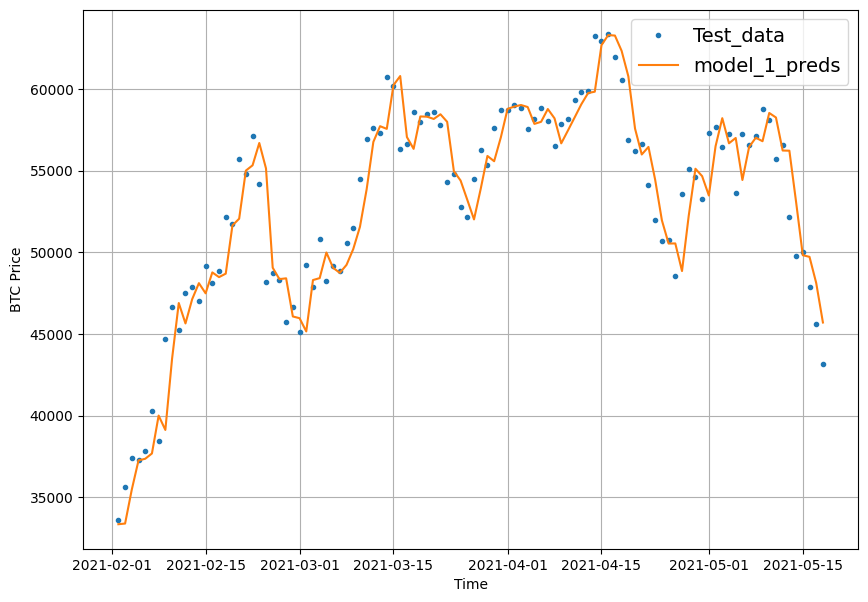

In [ ]:
#plot model 1 predictions
offset = 450
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


## Model 2: Dense(window = 30 , horizon = 1)


In [ ]:
HORIZON = 1 #predict one step at a time (one day of bitcon prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [ ]:
#make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                                labels = full_labels,
                                                                                test_split=0.2)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_2_dense")

model_2.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())
model_2.fit(train_windows,
            train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 623.7686


623.7685546875

In [ ]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/") #best performing epoch
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 623.7686


623.7685546875

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)
model_2_results

18/18 [==============================] - 0s 2ms/step


{'mae': 623.7686,
 'mse': 1315223.0,
 'rmse': 1146.8317,
 'mape': 2.828021,
 'mase': 1.0903537}

In [ ]:
#plot model 1 predictions
#offset = 450
#plt.figure(figsize=(10,7))
#plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test_data")
#plot_time_series(timesteps=x_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_2_preds")

##Model 3: Dense(window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows,full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows)

2751

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                                labels = full_labels)
len(train_labels), len(test_windows)

(2200, 551)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_3_dense")

model_3.compile(loss = "MAE",
                optimizer = tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1273.9899


1273.9898681640625

In [ ]:
model_3_preds = make_preds(model_3,
                          input_data = test_windows)
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

18/18 [==============================] - 0s 2ms/step


{'mae': array([ 403.6359  ,  227.03947 ,  208.10045 ,  414.85965 ,  300.22098 ,
         319.74658 ,  428.67703 ,  493.99478 ,  416.53635 ,  432.07394 ,
         572.6641  ,  644.2298  ,  771.33026 ,  689.0742  ,  439.30203 ,
         219.86147 ,  298.93472 ,  394.75217 ,  398.0358  ,  370.73248 ,
         145.95598 ,  159.60658 ,  228.67635 ,  207.16121 ,  175.00475 ,
         165.2302  ,  193.46492 ,  240.96867 ,  160.33887 ,  133.42885 ,
         161.51115 ,  216.71268 ,  172.41887 ,  148.99484 ,  244.19664 ,
         270.1027  ,  225.59787 ,  252.82143 ,  243.44273 ,  343.66156 ,
         605.2557  ,  147.3674  ,  195.88191 ,  177.62277 ,  117.691124,
         153.31982 ,  149.29988 ,  107.87618 ,  117.49337 ,  138.71303 ,
          80.01925 ,  198.75252 ,  195.9343  ,  228.07932 ,  344.72983 ,
         403.22406 ,  703.0472  ,  651.22003 ,  616.7235  ,  682.2316  ,
         467.57526 ,  252.13045 ,  329.01855 ,  528.0096  ,  503.43735 ,
         578.12604 ,  546.8858  ,  691.22766

Make our evaluate function work for larger horizons

In [ ]:
model_3_results["mae"].ndim,model_2_results["mae"].ndim

(1, 0)

In [ ]:
def evaluate_preds(y_true, y_pred):
  #make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred= tf.cast(y_pred, dtype = tf.float32)

  #calculate evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mae)
    rmse = tf.reduce_mean(rmse)
    mape= tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)


  return{"mae":mae.numpy(),
         "mse":mse.numpy(),
         "rmse":rmse.numpy(),
         "mape":mape.numpy(),
         "mase":mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1273.9899,
 'mse': 1273.9899,
 'rmse': 1471.8582,
 'mape': 5.6946287,
 'mase': 2.2669938}

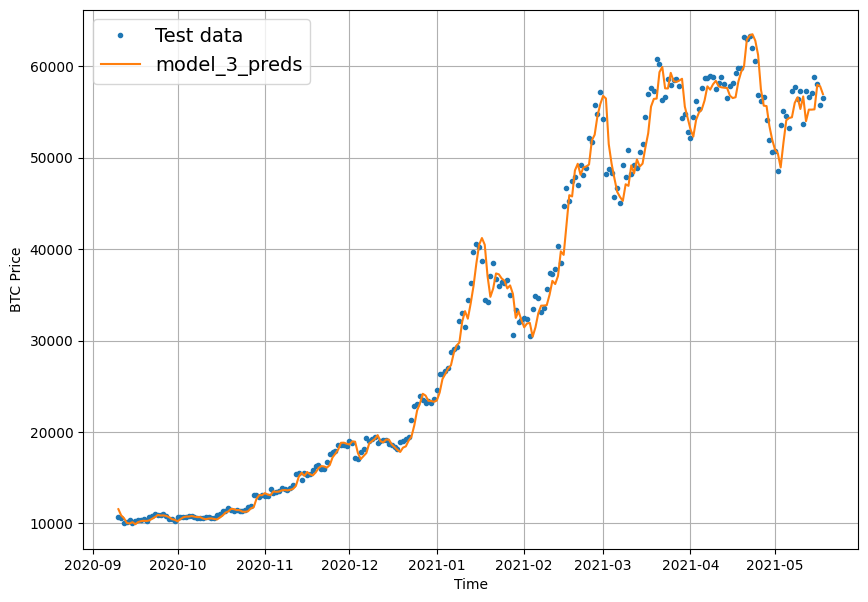

In [ ]:
offset = 300
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_test[-len(test_windows):], values = test_labels[:, 0], start = offset, label = "Test data")
plot_time_series(timesteps = x_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis = 1), start = offset, format = "-", label = "model_3_preds")

<Axes: >

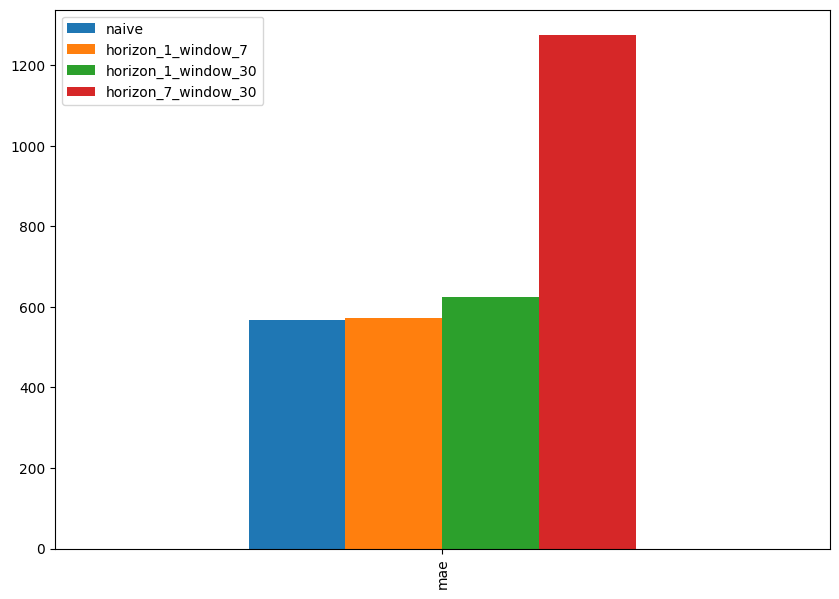

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30" : model_3_results["mae"]}, index = ["mae"]).plot(figsize=(10,7), kind = "bar")

#Model 4: Conv 1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7
full_windows ,full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

To use Conv1D we need an input shape of - batch_size, timesteps, input_dim

however our data train_windows has an input shape of window_size

In [ ]:
#Have to reshape out data
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x : tf.expand_dims(x, axis = 1)) #lambda layers allow us to turn a python function into an tf.keras layer for a model

In [ ]:
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shpae: \n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shpae: 
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x : tf.expand_dims(x, axis = 1)),
    layers.Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = "causal", activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_4conv1D")

model_4.compile(loss= "mae",
                optimizer = tf.keras.optimizers.Adam())
model_4.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

In [ ]:
model_4.summary()


Model: "model_4conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 625.1261


625.1260986328125

In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 564.7077


564.7077026367188

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                    y_pred = model_4_preds)
model_4_results

18/18 [==============================] - 0s 2ms/step


{'mae': 564.70776,
 'mse': 1164828.1,
 'rmse': 1079.272,
 'mape': 2.5281358,
 'mase': 0.99203515}

##Model 5: RNN (LSTM)

In [ ]:
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x : tf.expand_dims(x ,axis = 1))(inputs)
#x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(128, activation = "relu")(x)
#x = layers.Dense(32, activation = "relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs = inputs, outputs = output)

model_5.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())
model_5.fit(train_windows,
            train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 120ms/step - loss: 2506.9707 - val_loss: 10142.6797
Epoch 2/100
18/18 [==============================] - 2s 106ms/step - loss: 807.3350 - val_loss: 1415.3523
Epoch 3/100
18/18 [==============================] - 2s 129ms/step - loss: 260.3929 - val_loss: 1300.5598
Epoch 4/100
18/18 [==============================] - 2s 138ms/step - loss: 188.5787 - val_loss: 1052.9917
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 187.1077 - val_loss: 1112.8066
Epoch 6/100
18/18 [==============================] - 2s 105ms/step - loss: 186.5479 - val_loss: 1037.0847
Epoch 7/100
18/18 [==============================] - 2s 105ms/step - loss: 187.1652 - val_loss: 1023.6030
Epoch 8/100
18/18 [==============================] - 2s 130ms/step - loss: 181.9946 - val_loss: 1017.6434
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 180.5643 - val_loss: 1021.1990
Epoch 10/100
18/18 [============================

In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 574.3391


574.339111328125

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)
model_5_results

18/18 [==============================] - 0s 2ms/step


{'mae': 574.33905,
 'mse': 1203857.0,
 'rmse': 1097.2041,
 'mape': 2.5802844,
 'mase': 1.0089546}

##Model 6: Multivarient Data

In [ ]:
# add bitcoing harvesting events (price for mining halves)
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

#block rewards dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
#creat tdate ranges of where specific block_reqard values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

In [ ]:
#Add in a block_reqard column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

#Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Prices,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


<Axes: xlabel='Date'>

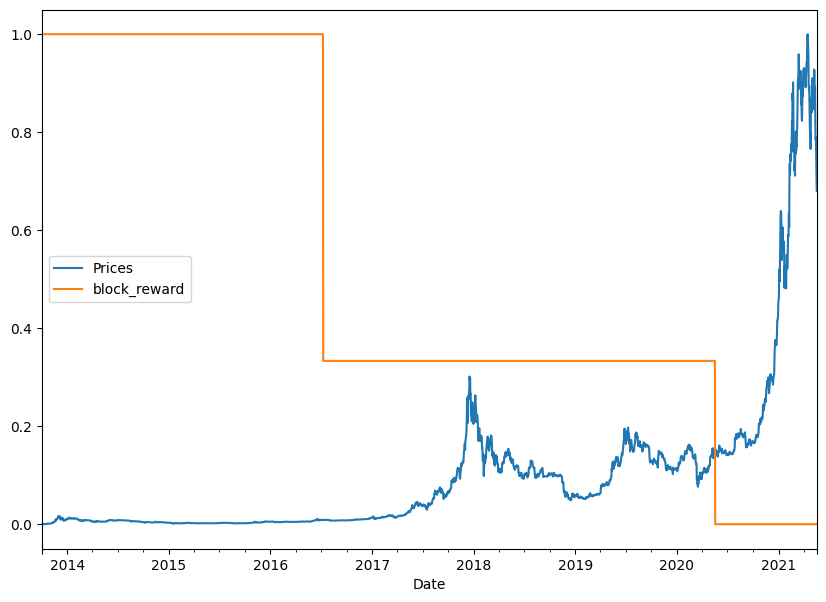

In [ ]:
#Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Prices", "block_reward"]]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

In [ ]:
#making a windowed dataset with pandas
HORIZON = 1
WINDOW_SIZE = 7

bitcoin_prices_windowed = bitcoin_prices_block.copy()

#Add windowed columns (window the dataset directly from pandas dataframe)
for i in range(WINDOW_SIZE): #SHift values for each step in window size
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Prices"].shift(periods = i+1)
bitcoin_prices_windowed.head(10)



,Prices,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
#Create x(windows) and y(horizons) features
X = bitcoin_prices_windowed.dropna().drop("Prices", axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Prices"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

##Model 6: Dense (multivariate time series)


In [ ]:
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_6_dense_multivariate")

model_6.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())
model_6.fit(X_train, y_train,
            epochs = 100,
            batch_size = 128,
            verbose = 1,
            validation_data = (X_test, y_test),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1559.3284 

18/18 [==============================] - 1s 37ms/step - loss: 1559.3284 - val_loss: 3000.0767
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 371.2139

18/18 [==============================] - 1s 32ms/step - loss: 371.2139 - val_loss: 1394.9932
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 188.5488

18/18 [==============================] - 1s 32ms/step - loss: 188.5488 - val_loss: 1093.6353
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 206.6671

18/18 [==============================] - 1s 51ms/step - loss: 167.4633 - val_loss: 881.1352
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 165.8086

18/18 [==============================] - 1s 31ms/step - loss: 156.3050 - val_loss: 854.2663
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 150.1579 - val_loss: 872.6856
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 180.6456

18/18 [==============================] - 1s 29ms/step - loss: 146.8377 - val_loss: 785.5225
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 143.4195 - val_loss: 787.2818
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 141.2886 - val_loss: 794.7195
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 142.6690

18/18 [==============================] - 1s 31ms/step - loss: 135.2116 - val_loss: 734.2866
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 137.4765

18/18 [==============================] - 0s 29ms/step - loss: 131.2785 - val_loss: 727.0635
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 130.4081 - val_loss: 799.4664
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 132.0660 - val_loss: 756.9814
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 130.8953

18/18 [==============================] - 1s 32ms/step - loss: 125.8075 - val_loss: 696.1544
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 128.0322

18/18 [==============================] - 1s 41ms/step - loss: 127.5499 - val_loss: 682.3619
Epoch 16/100
18/18 [==============================] - 0s 8ms/step - loss: 122.4645 - val_loss: 692.4398
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 120.9926 - val_loss: 693.3393
Epoch 18/100
14/18 [======================>.......] - ETA: 0s - loss: 124.1922

18/18 [==============================] - 1s 42ms/step - loss: 119.6844 - val_loss: 670.6239
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 116.8825 - val_loss: 677.0007
Epoch 20/100
13/18 [====================>.........] - ETA: 0s - loss: 119.2126

18/18 [==============================] - 1s 36ms/step - loss: 115.9919 - val_loss: 637.3637
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 129.5809

18/18 [==============================] - 1s 30ms/step - loss: 119.8532 - val_loss: 622.0088
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5825 - val_loss: 635.3738
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3129 - val_loss: 628.1316
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 114.8397 - val_loss: 625.5829
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5930 - val_loss: 640.5107
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 117.7865

18/18 [==============================] - 0s 28ms/step - loss: 115.7175 - val_loss: 598.9863
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 150.1556

18/18 [==============================] - 1s 29ms/step - loss: 115.5040 - val_loss: 597.5920
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 103.8127

18/18 [==============================] - 0s 29ms/step - loss: 112.0282 - val_loss: 593.1502
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 114.4246

18/18 [==============================] - 1s 29ms/step - loss: 112.0447 - val_loss: 590.9111
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 114.6517 - val_loss: 593.7568
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 114.9829 - val_loss: 595.8788
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7952 - val_loss: 598.0945
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9141 - val_loss: 616.4340
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 137.7168

18/18 [==============================] - 0s 28ms/step - loss: 111.0312 - val_loss: 584.2988
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 98.0753

18/18 [==============================] - 0s 28ms/step - loss: 110.1542 - val_loss: 581.7062
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 114.8282 - val_loss: 582.4951
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5958 - val_loss: 594.2103
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6574 - val_loss: 629.9265
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 131.1149

18/18 [==============================] - 1s 29ms/step - loss: 110.1316 - val_loss: 577.1055
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8319 - val_loss: 579.7305
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 108.8453

18/18 [==============================] - 0s 29ms/step - loss: 108.8453 - val_loss: 575.1130
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3572 - val_loss: 632.7671
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 115.7489 - val_loss: 637.2327
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 112.8564 - val_loss: 622.5447
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5119 - val_loss: 609.1346
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7398 - val_loss: 591.9683
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 110.1955 - val_loss: 579.1439
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9050 - val_loss: 611.8318
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 114.2285 - val_loss: 593.4186
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 0s 28ms/step - loss: 109.7628 - val_loss: 569.6452
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5034 - val_loss: 572.7328
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0498 - val_loss: 835.6329
Epoch 57/100
17/18 [===========================>..] - ETA: 0s - loss: 122.9836

18/18 [==============================] - 1s 30ms/step - loss: 122.6824 - val_loss: 569.1085
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 114.3858 - val_loss: 596.2344
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 111.0163 - val_loss: 711.9775
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 120.6560 - val_loss: 683.0748
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3910 - val_loss: 597.5333
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6347 - val_loss: 596.9428
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 114.6854 - val_loss: 626.9473
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8513 - val_loss: 572.2813
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 108.3957

18/18 [==============================] - 1s 53ms/step - loss: 108.3957 - val_loss: 565.2407
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6235 - val_loss: 566.8360
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8098 - val_loss: 667.7612
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 116.7968 - val_loss: 787.1953
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 126.7962 - val_loss: 569.4771
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 136.7661 - val_loss: 572.5427
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 113.6887 - val_loss: 583.9180
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 108.0987 - val_loss: 572.7965
Epoch 73/100
18/18 [==============================] - 0s 8ms/step - loss: 108.9395 - val_loss: 579.3534
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 11

18/18 [==============================] - 1s 43ms/step - loss: 106.8275 - val_loss: 563.2683
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 107.3293 - val_loss: 564.8969
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 107.0543 - val_loss: 596.8287
Epoch 80/100
14/18 [======================>.......] - ETA: 0s - loss: 114.7082

18/18 [==============================] - 1s 31ms/step - loss: 110.4773 - val_loss: 563.2027
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 106.3463 - val_loss: 588.9722
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3186 - val_loss: 591.9882
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 115.5984 - val_loss: 684.6732
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 116.0736 - val_loss: 575.1343
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0245 - val_loss: 588.7897
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5043 - val_loss: 583.6871
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.5572 - val_loss: 577.1316
Epoch 88/100
 1/18 [>.............................] - ETA: 0s - loss: 133.1504

18/18 [==============================] - 1s 30ms/step - loss: 109.4382 - val_loss: 562.8041
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9193 - val_loss: 581.7042
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7107 - val_loss: 641.5977
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 115.1882 - val_loss: 652.2267
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6400 - val_loss: 570.5012
Epoch 93/100
17/18 [===========================>..] - ETA: 0s - loss: 112.7598

18/18 [==============================] - 1s 31ms/step - loss: 111.9444 - val_loss: 562.6854
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9139 - val_loss: 563.7533
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6805 - val_loss: 570.5424
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 106.9534 - val_loss: 564.8606
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0035 - val_loss: 563.0328
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 107.3883 - val_loss: 564.0572
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 107.2471 - val_loss: 564.3667
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1244 - val_loss: 574.8178


In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 574.8178


574.8178100585938

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 562.6855


562.6854858398438

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)
model_6_results

18/18 [==============================] - 0s 1ms/step


{'mae': 562.6855,
 'mse': 1151956.4,
 'rmse': 1073.2922,
 'mape': 2.5162838,
 'mase': 0.98848253}

## Model 7: N-BEATS algorithm

In [ ]:
#Building and testing the N-BEATS block layer
class NBeatsBlock(tf.keras.layers.Layer): #layer subclass to create a layer that does not already exists in tf
  def __init__(self,
                input_size: int,
                theta_size: int,
                horizon: int,
                n_neurons: int,
                n_layers: int,
                **kwargs):# kward argument takes care of all arguments for the parent class (input_shape, trainable,name ect)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    #Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = "relu") for _ in range(n_layers)]
    #output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation = "linear", name = "theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)

    theta = self.theta_layer(x)
    #output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Testing the class with dummy inputs and outputs

In [ ]:
tf.random.set_seed(42) #set random weights
dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE + HORIZON, #backcast + forecast
                                       horizon = HORIZON,
                                       n_neurons = 512,
                                       n_layers = 4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis = 0) #input shpae to the model has to reflect dense
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
#pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
#These are the activaton outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcase:{tf.squeeze(backcast.numpy())}")
print(f"forecast:{tf.squeeze(forecast.numpy())}")

Backcase:[-0.2763865  -0.00168021  0.37772518 -0.05671166  0.0196991   0.20004153
  0.19206496]
forecast:-0.5880872011184692


Preparing data for the N-BEATS algorithm using tf.data

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7


In [ ]:
#Create NBEATS data inputs
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Prices+{i+1}"] = bitcoin_prices_nbeats["Prices"].shift(periods =i+1)

bitcoin_prices_nbeats.head()

,Prices,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop("Prices", axis = 1)
y = bitcoin_prices_nbeats.dropna()["Prices"]

split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train),len(y_test)

(2224, 556)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

#combine labels and features by ipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

#batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

setting up hyper paramaters for N-BEATS algorithm

In [ ]:
#Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

In [ ]:
#Residual Connections (two layers for subtract and add)
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

#Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

#Add]
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


Creating model

In [ ]:
tf.random.set_seed(42)

#setup instance of nBeats layer
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                theta_size = THETA_SIZE,
                                horizon = HORIZON,
                                n_neurons = N_NEURONS,
                                n_layers = N_LAYERS,
                                name = "InitialBlock")

#create input to stack
stack_input = layers.Input(shape = (INPUT_SIZE), name = "stack input")

#create initial backcast and forecast input
residuals, forecast = nbeats_block_layer(stack_input)

#create stacks of block layers
for i, _ in enumerate(range(N_STACKS - 1 )): #first stack is created in the line
  # Use the NBeats block to calculate the backbcase as well as the forecast
  backcast, block_forcast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NBeatsBlock{i}"
      )(residuals) #pass in residuals

  #create double residual stacking
  residuals = layers.subtract([residuals, backcast])
  forecast = layers.add([forecast, block_forcast])

model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name = "model_7_NBEATS")\

model_7.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            verbose = 0,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                          patience = 200,
                                                          restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                              patience = 100,
                                                              verbose = 1)])


Epoch 923: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1192: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1292: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 19ms/step - loss: 571.9797


571.979736328125

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)
model_7_results

1/1 [==============================] - 1s 1s/step


{'mae': 571.97974,
 'mse': 1165843.4,
 'rmse': 1079.7422,
 'mape': 2.6337173,
 'mase': 1.00481}

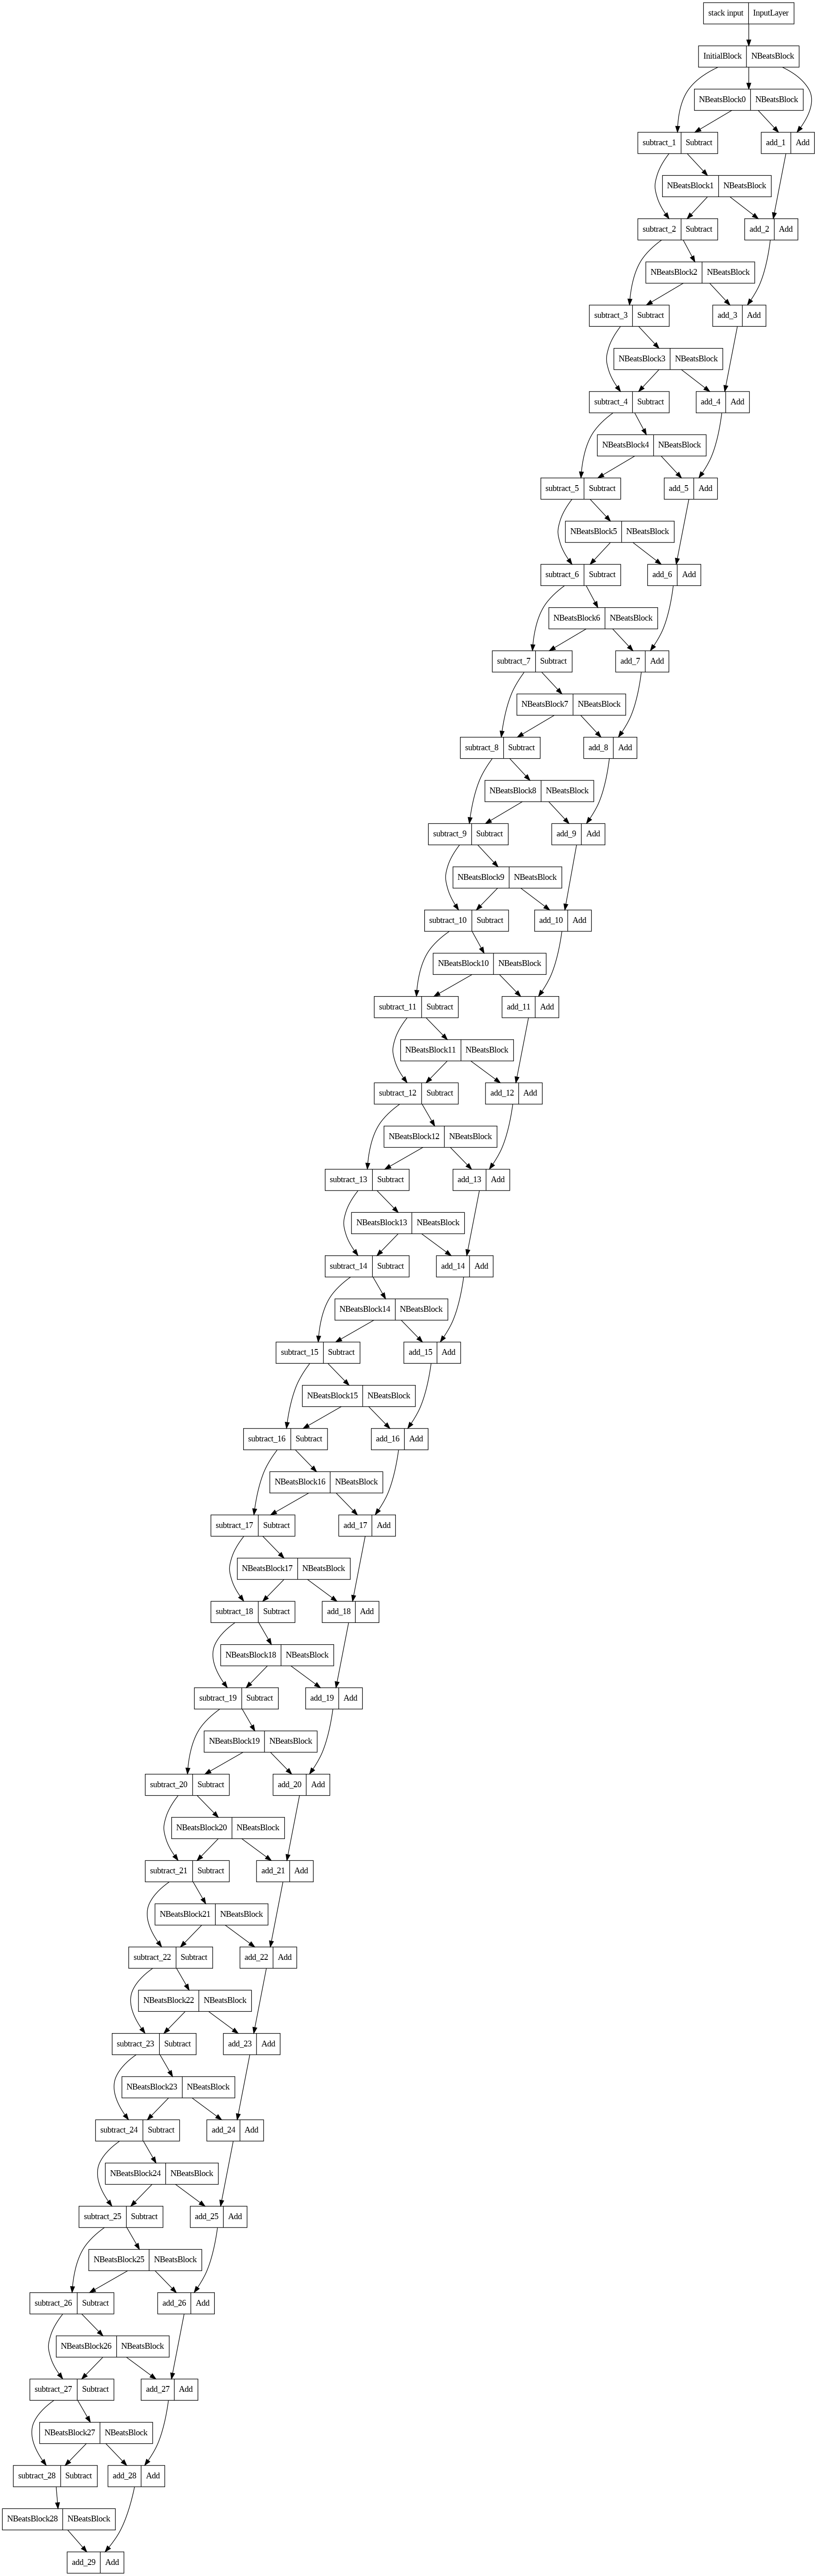

In [ ]:
#Plotting N-BEats model
from tensorflow.keras.utils import plot_model
plot_model(model_7)

##Model 8: Creating an ensemble (stacking models together)
levereges teh wisdom of the crowd effect by combining many different model to predict a common goal

In [ ]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10,
                        num_epochs = 1000,
                        loss_fn = ["mae", "mse", "mape"]):
  ensemble_models = []
  #create models for each loss function
  for i in range(num_iter):
    #build and fit a new model with a different loss function
    for loss_function in loss_fn:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      #Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          #initialize dense layers with normal distrubutionfor estimating prediction intervals
          layers.Dense(128, kernel_initializer = "he_normal", activation = "relu"),
          layers.Dense(128, kernel_initializer = "he_normal", activation = "relu"),
          layers.Dense(HORIZON)
      ])

      #Compile simple model with current loss function
      model.compile(loss = loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae", "mse"])
      model.fit(train_data,
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                              patience = 200,
                                                              restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                                  patience = 100,
                                                                  verbose = 1)])

      ensemble_models.append(model)
  return ensemble_models

In [ ]:
ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 480: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 580: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 189: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 289: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 443: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 543: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 322: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 422: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

In [ ]:
#Make prediction with our ensemble model
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data = test_dataset)


#ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)

ensemble_median = np.median(ensemble_preds, axis = 0)

ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_median)
ensemble_results

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 38ms/step


{'mae': 568.19727,
 'mse': 1144212.2,
 'rmse': 1069.6786,
 'mape': 2.5601416,
 'mase': 0.9981652}

Plotting prediction intervals (uncertainty estimates) of our ensemble

In [ ]:
#Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis = 0)
  interval = 1.96 *std # gets a 95% interal
  preds_mean = tf.reduce_mean(preds, axis = 0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

In [ ]:
lower, upper = get_upper_lower(ensemble_preds)


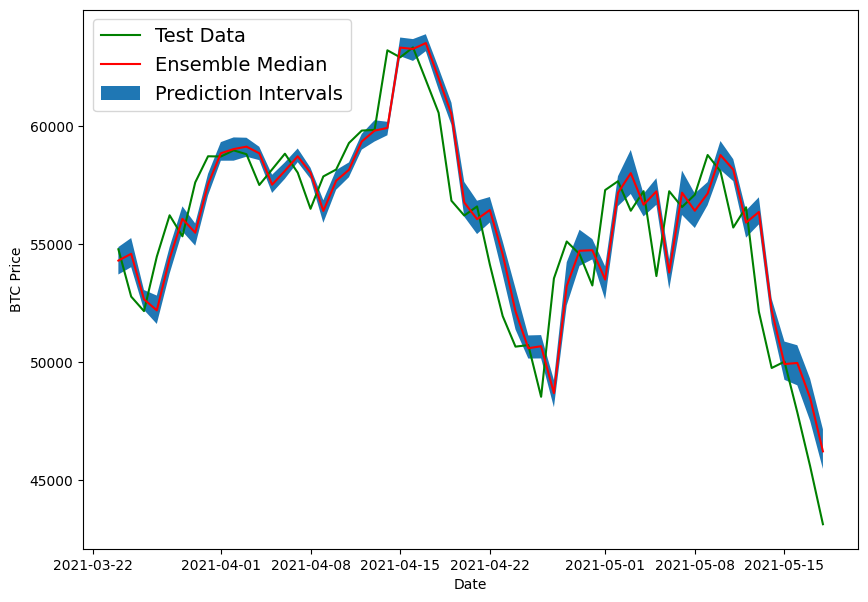

In [ ]:
#Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis = 0)

#Plot the median of ensemble preds along with prediction intervals
offset = 500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g-", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "r-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")

plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label = "Prediction Intervals")
plt.legend(loc="upper left", fontsize = 14)

##Model 9: Train a model on the full historical data to make prediction into the future

In [ ]:
#Train model
x_all = bitcoin_prices_windowed.dropna().drop(["Prices", "block_reward"], axis = 1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Prices"].to_numpy()
len(x_all), len(y_all)

(2780, 2780)

In [ ]:
#turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam())
model_9.fit(dataset_all,
            epochs = 100,
            verbose = 0)

In [ ]:
#make predictions into the future
INTO_FUTURE = 14
def make_future_forecasts(values, model, into_future, window_size = WINDOW_SIZE) -> list:
  future_forecast = []
  last_window = values[-WINDOW_SIZE] #last window sized array of data
  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE]

In [ ]:
#Make forcast into the future
future_forecast = make_future_forecasts(values = y_all,
                                        model = model_9,
                                        into_future = INTO_FUTURE,
                                        window_size = WINDOW_SIZE)


ValueError: ignored